## Importing the required packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import fbeta_score

#### Setting up the random seed
to ensures that experiments are reproducible (get consistent results accross runs). It ensure that the same sequence of random numbers is generated each time we run our code.
This consistency is essential for comparing different models, hyperparameters, or algorithms.

In [ ]:
np.random.seed(67)

#### Reading the training dataset

In [ ]:
train_df= pd.read_csv('/content/drive/MyDrive/csv files/carvan_train.csv')
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      5822 non-null   int64
 1   V2      5822 non-null   int64
 2   V3      5822 non-null   int64
 3   V4      5822 non-null   int64
 4   V5      5822 non-null   int64
 5   V6      5822 non-null   int64
 6   V7      5822 non-null   int64
 7   V8      5822 non-null   int64
 8   V9      5822 non-null   int64
 9   V10     5822 non-null   int64
 10  V11     5822 non-null   int64
 11  V12     5822 non-null   int64
 12  V13     5822 non-null   int64
 13  V14     5822 non-null   int64
 14  V15     5822 non-null   int64
 15  V16     5822 non-null   int64
 16  V17     5822 non-null   int64
 17  V18     5822 non-null   int64
 18  V19     5822 non-null   int64
 19  V20     5822 non-null   int64
 20  V21     5822 non-null   int64
 21  V22     5822 non-null   int64
 22  V23     5822 non-null   int64
 23  V24     5822 

In [ ]:
train_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


#### Visualizing <br>
All variables are continuous in this datase. so using histogram to visualize them. Histograms are not continuous indicating there are many features which are categorical although having numeric values and data type being INT. And even after reading the data dictionary we would come to know that they are categorical.  So will create a dummy encodig for them with frequency cutoff.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
for i, col in enumerate(train_df.columns):
    plt.figure(i)
    sns.histplot(train_df[col], stat='density', kde=True, kde_kws={"cut": 3})
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

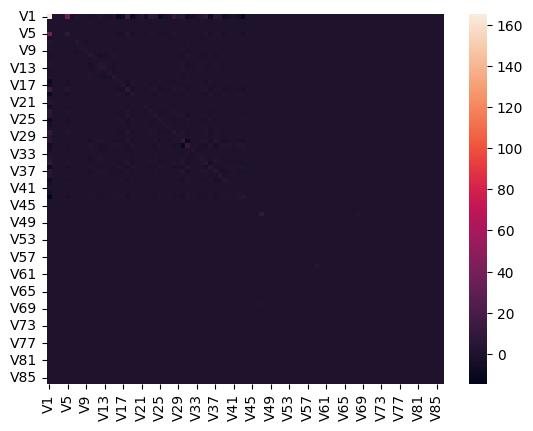

In [ ]:
import seaborn as sns
sns.heatmap(train_df.cov())

The variables in this heatmap appears to be largely uncorrelated with each other.<br>
Since they are largely uncorrelated, PCA might not provide significant benefit. It works best when there are strong correlations among variables. So instead of focusing on reducing the dimensionality will make use of all the variables to make predictions<br>


In [ ]:
for i in train_df.columns:

  print(train_df[i].value_counts())

V1
33    810
38    339
8     339
39    328
9     278
23    251
3     249
36    225
35    214
31    205
41    205
34    182
24    180
13    179
10    165
11    153
32    141
37    132
1     124
6     119
30    118
12    111
22     98
29     86
2      82
25     82
40     71
4      52
27     50
26     48
5      45
7      44
28     25
20     25
18     19
16     16
21     15
17      9
15      5
19      3
Name: count, dtype: int64
V2
1     5267
2      505
3       39
7        5
4        2
10       1
5        1
8        1
6        1
Name: count, dtype: int64
V3
3    2646
2    2131
4     693
1     284
5      68
Name: count, dtype: int64
V4
3    3000
2    1452
4    1073
5     193
1      74
6      30
Name: count, dtype: int64
V5
8     1563
3      886
9      667
5      569
1      552
7      550
2      502
10     276
6      205
4       52
Name: count, dtype: int64
V6
0    3228
1    1599
2     733
3     152
4      66
5      18
6      13
7       6
9       4
8       3
Name: count, dtype: int64
V7
4   

In [ ]:
X =train_df.drop('V86', axis=1)
y =train_df['V86']

#Splitting the dataset using Stratify
*As data is highly IMBALANCED using a STRATIFY technique to give equal representation to each target variable. When records of a particular class are much more than those of another class, our classifier may get biased towards prediction and to avoid that making use of stratify.*

<br>

*Earlier i had tried with SMOTE but my fbeta score improved when i just used STRATIFY in my train_test_split suggesting Stratify worked better than SMOTE on this dataset as different technique can work differently on different datasets as every dataset is unique in itself*
<br>


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,stratify=y , random_state=67)

In [ ]:
num_var =['V2','V3','V65','V66','V67','V68','V69','V70','V71','V72','V73',
          'V74','V75','V76','V77','V78','V79','V80','V81','V82','V83','V84','V85']


In [ ]:
cat_vars =[i for i in list(X_train.columns) if i not in num_var]  # 150 threshold
cat_vars

['V1',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64']

# Building our custom functions

#### class for variable/ feature selection

In [ ]:
class VarSelector(BaseEstimator, TransformerMixin):  # inherit the modules, same sequence standard practice /norm
    def __init__(self, feature_names):
       self.feature_names = feature_names   # global - written using self, so it is available inside that class

    # fit n trnsform are part of sklearn we r overwriting it with our own code
    def fit(self,x,y=None):  # fit method implements a logic on data, learns from the data
        return self

    def transform(self,X): # whatever it has learnt from the fit it 'apply' on that data
        return X[self.feature_names]  # getting the feature names as it is

    def get_feature_names(self):  # give the feature/ column names to be written
        return self.feature_names
    def get_feature_names_out(self, feature_names_out): # taking the input of what feature names need to be given out
        return self.feature_names

class pdPipeline(Pipeline):
    def get_feature_names(self):
        last_step = self.steps[-1][-1]
        return last_step.get_feature_names()



#### class for dummy creation with frequency cutoff

In [ ]:
class get_dummies_cutoff(BaseEstimator, TransformerMixin):
    def __init__(self, freq_cutoff=0):
        self.freq_cutoff =freq_cutoff
        self.var_cat_dict ={}
        self.feature_names =[]

    def fit(self, x,y=None):
        #Given a dataset x, the fit method computes the categories for each feature
        #based on their frequency.
        data_cols = x.columns
        for col in data_cols:
            k =x[col].value_counts()
            if(k<= self.freq_cutoff).sum() ==0:
                cats =k.index[:-1]
            else:
                cats =k.index[k >self.freq_cutoff]
            self.var_cat_dict[col] =cats

        for col in self.var_cat_dict.keys():
            for cat in self.var_cat_dict[col]:
                self.feature_names.append(col+ '_' + str(cat))
        return self

    def transform(self,x,y=None):
        # The transform method creates dummy variables for each category in the dataset.
        dummy_data =x.copy()

        for col in self.var_cat_dict.keys():
            for cat in self.var_cat_dict[col]:
                name =col+ '_'+ str(cat)
                dummy_data[name] = (dummy_data[col] == cat).astype(int) # Compare with the actual category
                # (dummy_data[col] == str(cat)) --- error

            # The issue is that the condition (dummy_data[col] == str(cat)) is always evaluating to False, resulting in all zeros.
            #This happens because the original values in dummy_data[col] are not equal to the string representation of the category (str(cat)).
            del dummy_data[col] #removes the original categorical feature from the dataset
        return dummy_data

    def get_feature_names(self):
        return self.feature_names

    def get_feature_names_out(self, feature_names_out):
        return self.feature_names

        # fit method
#If the frequency of a category is less than or equal to the freq_cutoff,
#it includes all categories except the last one (since it’s not below the threshold)
# Otherwise, it includes only the categories with frequency greater than
# the freq_cutoff
# The resulting categories are stored in var_cat_dict

In [ ]:

X_train[cat_vars] =X_train[cat_vars].astype(object)

X_test[cat_vars] = X_test[cat_vars].astype(object)

X_train[cat_vars].dtypes, X_test[cat_vars].dtypes

(V1     object
 V4     object
 V5     object
 V6     object
 V7     object
         ...  
 V60    object
 V61    object
 V62    object
 V63    object
 V64    object
 Length: 62, dtype: object,
 V1     object
 V4     object
 V5     object
 V6     object
 V7     object
         ...  
 V60    object
 V61    object
 V62    object
 V63    object
 V64    object
 Length: 62, dtype: object)

#### setting up the pipleine and fitting the training dataset

In [ ]:
p1 =pdPipeline([
    ('cat_var', VarSelector(cat_vars)),
    ('dummies',get_dummies_cutoff(300))
])


p2 = pdPipeline([
    ('num_select',VarSelector(num_var)),
])

In [ ]:
data_pipe = FeatureUnion([
    ('cat_pipe',p1),
    ('num_pipe',p2)
])

In [ ]:
dp_new = data_pipe.fit(X_train)
dp_new

FeatureUnion(transformer_list=[('cat_pipe',
                                pdPipeline(steps=[('cat_var',
                                                   VarSelector(feature_names=['V1',
                                                                              'V4',
                                                                              'V5',
                                                                              'V6',
                                                                              'V7',
                                                                              'V8',
                                                                              'V9',
                                                                              'V10',
                                                                              'V11',
                                                                              'V12',
                                                                              'V13',
                                                                              'V14',
                                                                              'V15',
                                                                              'V16',
                                                                              'V17',
                                                                              'V18',
                                                                              'V19',
                                                                              'V20',
                                                                              'V21',
                                                                              'V22',
                                                                              'V23',
                                                                              'V24',
                                                                              'V25',
                                                                              'V26',
                                                                              'V27',
                                                                              'V28',
                                                                              'V29',
                                                                              'V30',
                                                                              'V31',
                                                                              'V32', ...])),
                                                  ('dummies',
                                                   get_dummies_cutoff(freq_cutoff=300))])),
                               ('num_pipe',
                                pdPipeline(steps=[('num_select',
                                                   VarSelector(feature_names=['V2',
                                                                              'V3',
                                                                              'V65',
                                                                              'V66',
                                                                              'V67',
                                                                              'V68',
                                                                              'V69',
                                                                              'V70',
                                                                              'V71',
                                                                              'V72',
                                                                              'V73',
                                                                              'V74',
                                                              

#### Transforming the training(train and test part) and testing dataset

In [ ]:
X_train_train = pd.DataFrame(data=dp_new.transform(X_train), columns=data_pipe.get_feature_names_out())
X_train_train.head()

,cat_pipe__V1_33,cat_pipe__V4_3,cat_pipe__V4_2,cat_pipe__V4_4,cat_pipe__V5_8,cat_pipe__V5_3,cat_pipe__V5_9,cat_pipe__V5_5,cat_pipe__V5_7,cat_pipe__V5_1,...,num_pipe__V76,num_pipe__V77,num_pipe__V78,num_pipe__V79,num_pipe__V80,num_pipe__V81,num_pipe__V82,num_pipe__V83,num_pipe__V84,num_pipe__V85
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test_test =pd.DataFrame(data= dp_new.transform(X_test), columns=data_pipe.get_feature_names_out())
X_test_test.head()

,cat_pipe__V1_33,cat_pipe__V4_3,cat_pipe__V4_2,cat_pipe__V4_4,cat_pipe__V5_8,cat_pipe__V5_3,cat_pipe__V5_9,cat_pipe__V5_5,cat_pipe__V5_7,cat_pipe__V5_1,...,num_pipe__V76,num_pipe__V77,num_pipe__V78,num_pipe__V79,num_pipe__V80,num_pipe__V81,num_pipe__V82,num_pipe__V83,num_pipe__V84,num_pipe__V85
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X_train_train.shape, X_test_test.shape

((4657, 245), (1165, 245))

**Reading the final test dataset given for prediction**

In [ ]:
caravan_data =pd.read_csv('/content/drive/MyDrive/carvan_test.csv')
caravan_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
caravan_data[cat_vars] = caravan_data[cat_vars].astype(object)
caravan_data[cat_vars].dtypes

V1     object
V4     object
V5     object
V6     object
V7     object
        ...  
V60    object
V61    object
V62    object
V63    object
V64    object
Length: 62, dtype: object

In [ ]:
X_test_data_final = pd.DataFrame(data= dp_new.transform(caravan_data), columns= data_pipe.get_feature_names_out())
X_test_data_final.head()

,cat_pipe__V1_33,cat_pipe__V4_3,cat_pipe__V4_2,cat_pipe__V4_4,cat_pipe__V5_8,cat_pipe__V5_3,cat_pipe__V5_9,cat_pipe__V5_5,cat_pipe__V5_7,cat_pipe__V5_1,...,num_pipe__V76,num_pipe__V77,num_pipe__V78,num_pipe__V79,num_pipe__V80,num_pipe__V81,num_pipe__V82,num_pipe__V83,num_pipe__V84,num_pipe__V85
0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
y_train.value_counts()

V86
0    4379
1     278
Name: count, dtype: int64

In [ ]:
X_train.index ==y_train.index

array([ True,  True,  True, ...,  True,  True,  True])

#### creating a model dictionary with their hypermaters to tune them to find best model.

In [ ]:
model_dict ={
    'logreg' : {'class_weight' : ['balanced',None],
               'penalty' : ['l1','l2'],
               'C' : [.0001, .0005,.001,.005,.01,.05,.1,1,2,5],
               'solver': ['liblinear']
               },


    'dt' : {'class_weight' : [None, 'balanced'],
           'max_depth': [None,5,10,15,20,30,50,70],
           'min_samples_leaf' : [1,2,5,10,15,20],
           'min_samples_split' : [2,5,10,15,20]},

    'rf' : { 'n_estimators' : [100,200],
            'max_features' :[5,10,15,20,25,30,35],
            'bootstrap' : [True,False],
            'class_weight' :[None, 'balanced']},


    'extra_tree' : {
    'n_estimators': [100,200],
    'max_features' :[5,10,20,25,30,35],
    'bootstrap': [True, False],
    'class_weight':[None,'balanced'],
    'max_depth':[None,5,10,15,20,30,50,70],
    'min_samples_leaf': [1,2,5,10,15,20],
    'min_samples_split': [2,5,10,15,20]},




}

In [ ]:
def report(results, n_top=1):   # n_top= 1 than 'Model with rank' always 1 bcoz we r choosing rank 1 from each model
    for i in range(1, n_top +1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean vlaidation score :{0:.5f} (std: {1:.5f})'.format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print('Parameters :{0}'.format(results['params'][candidate]))
            print("")


def run_model(X_train_data, X_test_data, y_train_data,y_test_data,model,metric):
    best_fbeta_score = 0
    best_model_name = None
    for i in model.keys():
        if i == 'logreg':
            mod =LogisticRegression(random_state=67)
        if i =='dt':
            mod = DecisionTreeClassifier(random_state=67)
        if i == 'rf':
            mod = RandomForestClassifier(random_state=67)

        if i=='extra_tree':
            mod = ExtraTreesClassifier(random_state=67)


        random_search = RandomizedSearchCV(mod,scoring=metric, param_distributions=model_dict[i],
                                          cv=5, n_iter=20, n_jobs=-1,
                                          verbose=0)
        random_search.fit(X_train_data,y_train_data)
        final_mod =random_search.best_estimator_
        y_pred =final_mod.predict(X_test_data)

        beta =2
        fbeta =fbeta_score(y_test_data,y_pred,beta=beta)


        print(f"F-beta score (beta={beta}): {fbeta:.4f}")
        print(final_mod)
        report(random_search.cv_results_)
        print('################===============###############')

         # Update the best model if the current F1 score is higher
        if fbeta > best_fbeta_score:
            best_fbeta_score = fbeta
            best_model_name = i

    print(f"Best model: {best_model_name} with Fbeta score: {best_fbeta_score}")



In [ ]:
from sklearn.metrics import roc_auc_score
run_model(X_train_train,X_test_test,y_train,y_test,model_dict,'roc_auc')

F-beta score (beta=2): 0.3560
LogisticRegression(C=0.005, class_weight='balanced', random_state=67,
                   solver='liblinear')
Model with rank: 1
Mean vlaidation score :0.75456 (std: 0.01222)
Parameters :{'solver': 'liblinear', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.005}

################===============###############
F-beta score (beta=2): 0.2762
DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=20, min_samples_split=15,
                       random_state=67)
Model with rank: 1
Mean vlaidation score :0.65112 (std: 0.03955)
Parameters :{'min_samples_split': 15, 'min_samples_leaf': 20, 'max_depth': 20, 'class_weight': 'balanced'}

################===============###############
F-beta score (beta=2): 0.0172
RandomForestClassifier(max_features=30, random_state=67)
Model with rank: 1
Mean vlaidation score :0.70681 (std: 0.00865)
Parameters :{'n_estimators': 100, 'max_features': 30, 'class_weight': None, 'bootstra

## Final model with ExtraTreeClassifier

For evaluating models performance making use of Fbeta-score.  <br>
The F-beta score generalizes the F1-score by introducing a configuration parameter called beta.
A default beta value of 1.0 corresponds to the F1-measure.
Smaller beta values (e.g., 0.5) emphasize precision, while larger beta values (e.g., 2.0) focus more on recall.
It’s useful when both precision and recall matter, but one needs slightly more attention than the other (e.g., prioritizing false negatives over false positives).
In summary, the F-beta score allows us to balance precision and recall based on our specific requirements.


In [ ]:
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import fbeta_score

# Create the model with chosen hyperparameters

model = ExtraTreesClassifier(**{'n_estimators': 200, 'min_samples_split': 5,
                            'min_samples_leaf': 10, 'max_features': 30,
                            'max_depth': 5, 'class_weight': 'balanced',
                            'bootstrap': False})

# Perform cross-validation
scores = cross_val_score(model, X_train_train, y_train, cv=5, scoring='f1')

# Evaluate on a separate test set (X_test, y_test)
model.fit(X_train_train, y_train)
y_pred = model.predict(X_test_test)
fbeta = fbeta_score(y_test, y_pred, beta=2)

print("Cross-Validation F1 Scores:", scores)
print("Fbeta Score on Test Set:", fbeta)


Cross-Validation F1 Scores: [0.25316456 0.20833333 0.2189781  0.18075802 0.1871345 ]
Fbeta Score on Test Set: 0.43300653594771243


In [ ]:
pd.crosstab(y_test,y_pred)

col_0,0,1
V86,,
0,816,279
1,17,53


In [ ]:
cutoffs = np.linspace(0.01,0.99,99)

In [ ]:
test_score= model.predict_proba(X_test_test)[:,1] # 1 :,1 means p values

real = y_test
# in order to find the probability of which column is for outcome 1 and which for outcome0

In [ ]:
# checking at which cutoff metrics are performing well, so trying all cutoff values


F1_all= []
fbeta_all =[]
#precision_all =[]
#recall_all =[]

# predict_proba(X_train) - train_score
for cutoff in cutoffs:
    predicted =(test_score > cutoff).astype(int) # p > cutoff (true) then set to 1 other 0
    TP =((predicted==1) & (real==1)).sum()  # real = y_train
    TN =((predicted==0) & (real==0)).sum()
    FP =((predicted==1) & (real==0)).sum()
    FN =((predicted==0) & (real==1)).sum()

    P= TP+FN
    N =TN +FP

    Precision =TP/(TP+FP)
    Recall =TP/P
    F1 =(2*Precision *Recall)/ (Precision +Recall)
    fbeta =((1+2**2)*Precision * Recall)/((2**2 *Precision)+Recall)

    #precision_all.append(Precision)
    #recall_all.append(Recall)
    F1_all.append(F1)
    fbeta_all.append(fbeta)


In [ ]:
mycutoff = cutoffs[fbeta_all == max(fbeta_all)]
mycutoff

array([0.55])

In [ ]:
pd.set_option('display.max_rows',10000)
pd.DataFrame({'cutoff': cutoffs,
             'F1': F1_all,
              'fbeta' : fbeta_all
             })

,cutoff,F1,fbeta
0,0.01,0.113360,0.242215
1,0.02,0.113360,0.242215
2,0.03,0.113360,0.242215
3,0.04,0.113360,0.242215
4,0.05,0.113360,0.242215
5,0.06,0.113360,0.242215
6,0.07,0.113360,0.242215
7,0.08,0.113360,0.242215
8,0.09,0.113360,0.242215
9,0.10,0.113360,0.242215


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_score>0.55))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1095
           1       0.20      0.64      0.30        70

    accuracy                           0.82      1165
   macro avg       0.59      0.74      0.60      1165
weighted avg       0.93      0.82      0.86      1165



In [ ]:
pd.crosstab(y_test,test_score>0.55)

col_0,False,True
V86,,
0,912,183
1,25,45


In [ ]:
f_beta = fbeta_score(y_test, test_score>0.55, beta=2)
f_beta

0.4429133858267717

In [ ]:
final_test_score = model.predict(X_test_data_final >0.55)
final_test_score[:50]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1])

In [ ]:
pd.Series(final_test_score).value_counts()

0    2849
1    1151
Name: count, dtype: int64

In [ ]:
pd.DataFrame(final_test_score).to_csv('carvan_insurance_attempt4.csv', index=False)